#HW8 Eligibility and Traces


##environment
The grid world size is 10*5 like following, red color and edge represent walls, every transition get reward = -1, if agent step into the swamps, get -10 reward.

parameters:

discounted rate = 1.0

learning rate = 0.1

lambda = 0.9

epsilon = 0.1

total_episode = 100


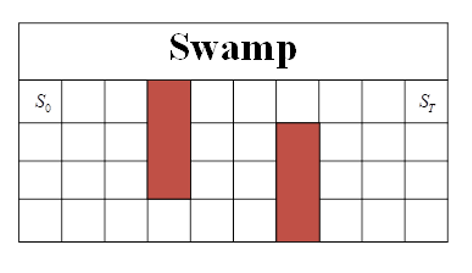

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rd
from collections import defaultdict


In [30]:
ACTIONS = [np.array([-1, 0]),
           np.array([0, 1]),
           np.array([1, 0]),
           np.array([0, -1])]
gamma = 1
alpha = 0.1
Lambda = 0.9
epsilon = 0.1
S0 = [1,0]
ST = [1,9]

In [31]:
# Environment
def step(state, action):
  SWAMP = [[0,i] for i in range(10)]
  WALL = [[1,3],[2,3],[3,3],[2,6],[3,6],[4,6]]
  state_n = list(np.array(state) + np.array(action))
  state_n = [np.clip(state_n[0],0,4),np.clip(state_n[1],0,9)]
  state_n = state if state_n in WALL else state_n
  reward = -1
  if state_n in SWAMP:
     reward = -10
  return [state_n, reward]

In [32]:
def chooseAction(state, qtable, epsilon):
  if rd.rand()>=epsilon:
    return np.argmax(qtable[state[0],state[1]])
  else:
    return rd.randint(4)

In [33]:

def sarsa():
  qtable = rd.rand(5,10,4)
  qtable[1,9,:]=0
  returns = []
  for episode in range(100):
   ######code######
    state = S0
    _returns = 0
    
    while state != ST:
        
      action_choose = chooseAction(state,qtable,epsilon)  
      action = ACTIONS[action_choose]  
      state_ , reward = step(state,action)
      
      x , y = state
      x2 , y2 = state_

      action_choose_2 = np.argmax(qtable[x2][y2])
      
      a = action_choose
      a2 = action_choose_2     
      
      qtable[x][y][a] = qtable[x][y][a] + alpha*(reward+gamma*qtable[x2][y2][a2]-qtable[x][y][a])
      
      state = state_
      
      _returns = reward + _returns
      
    returns.append(_returns)
  ################## 
    
  return returns

In [34]:
def sarsa_L():
  qtable = rd.rand(5,10,4)
  qtable[1,9,:]=0
  returns = []
  for episode in range(100):
   ######code######
    state = S0
    _returns = 0
    ztable = np.zeros((5,10,4))
    
    while state != ST:
        
      action_choose = chooseAction(state,qtable,epsilon)  
      action = ACTIONS[action_choose]  
      state_ , reward = step(state,action)
      
      x , y = state
      x2 , y2 = state_

      action_choose_2 = np.argmax(qtable[x2][y2])
      
      a = action_choose
      a2 = action_choose_2     
      
      delta = (reward+gamma*qtable[x2][y2][a2]-qtable[x][y][a])
      ztable[x][y][a] =  ztable[x][y][a] + 1
      for i in range(5):
        for j in range(10):
          for k in range(4):
            qtable[x][y][a] = qtable[x][y][a] + alpha * delta * ztable[x][y][a]
            ztable[x][y][a] = gamma * Lambda * ztable[x][y][a]
      
      state = state_
      
      _returns = reward + _returns
      
    returns.append(_returns)
  ################## 
    
  return returns

(-1000.0, 0.0)

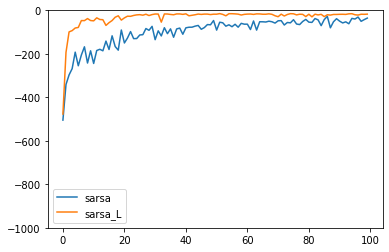

In [35]:
plt.plot(np.average([sarsa() for i in range(5 )],axis=0),label='sarsa')
plt.plot(np.average([sarsa_L() for i in range(5 )],axis=0),label='sarsa_L')
plt.legend()
plt.ylim(-1000,0)



## Result(60%)
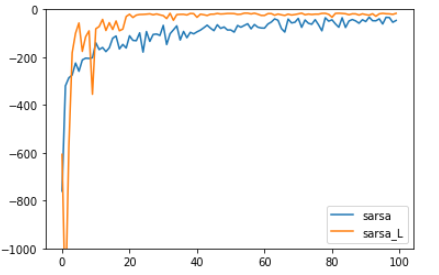

# Experiment1 (20%)

Compare the result of $sarsa(0.0)$,$sarsa(0.5)$,$sarsa(0.9)$,$sarsa$,in one graph.

Ans E1.

根據 $\lambda-Return$ 的定義:

$G^\lambda_t\triangleq(1-\lambda)\sum_{n=1}^{\infty} \lambda^{n-1}G_{t:t+n}$

當 $\lambda = 0$ 時，其Return只加總上一步的Reward，因此結果和TD-Method中的1-Step SARSA相似。

當 $\lambda$ 逐漸增加時，其Return在計算過程會加權更多項Reward，因此在Average Reward表現上，收歛速度逐漸增加，結果趨近於Monte-Carlo。

由下圖可看出不同 $\lambda$ 下，學習曲線的變化。

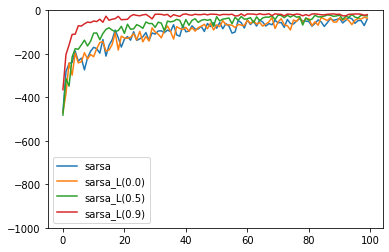

# Experiment2 (20%)
In Sarsa lambda algorithm line 12, we can use both accumulating traces or replacing trace.

If we use accumulating traces, In which condiction $\alpha*z(s,a)$ in line 14 will greater than 1? 
And what happen if $\alpha*z(s,a)$ greater than 1, show your result.


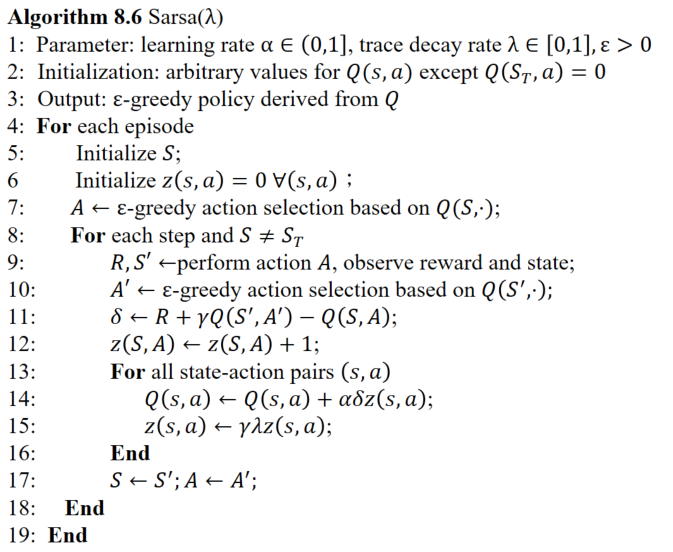

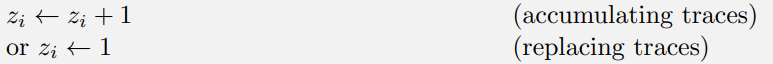

Ans E2.

$\lambda$ 值的變化，相當於 $\lambda-Return$ 的 Discount Rate。

最初設定 $\lambda=0.9$ 時，$\alpha*z(s,a)$ 在計算過程中並不會大於1。

若設定 $\lambda$ 大於1時，$\alpha*z(s,a)$ 也會大於1，造成計算過程拉長，且導致最後Average Reward發散。